# Topic 4: Behavioral science, “The price of obesity”

# Enviormental Impacts

# James Lawson

In 1937 George Orwell suggested that “changes of diet” might be more important than “changes of dynasty or even of religion.”Now he is being proved right in a way he might not have expected. Having spent millennia worrying about not having enough food, mankind’s main concern is now eating too much. Having too much toeat seems to be the worstin the United States,home to the highest number of overweight and obese people in the OECD developed countries group. A recentOECD health report projectedthat almost 50% of Americans will be obese by the year 2030. What makes the US so much more obese than other developed countries? 

You have been hired as an intern by a state senator who is leading a subcommittee on obesity prevention. One of the goals of the subcommittee is to slow down the risein obesity rates in the U.S. As a part of the internship, your team will need to locate reliable data on obesity in different countries, and to conduct a rigorous analysis to identify criteria which contribute to obesity levels in the countries which havelow and high obesity rates. What is so special about other OECD countries that make their citizens to be so much thinner? What is the U.S.lacking which makes it more obese than the other countries? You will then translate yourdata into practical policy recommendations for the senator.

##  Part 1: Looking at data as a whole: Year vs. Obesity %

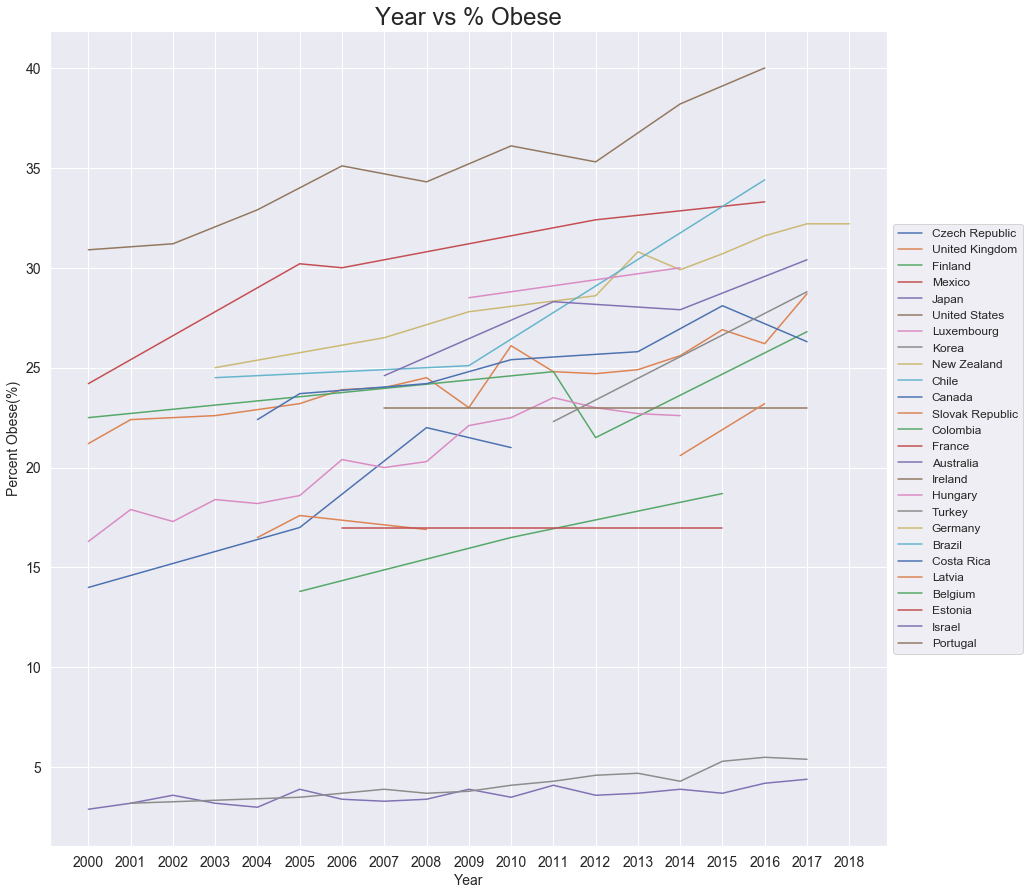

In [171]:
#functions are added here
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

def bootstrap_replicate_1d(data, func):
    # Chosse entries out of the data array
    bs_sample = np.random.choice(data, len(data))
    # Compute statistics using specify function and return the result
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

#import all necessary libraries
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

#use seaborn plotting settings
sns.set()

#import dataset
dfTotalPopulation = pd.read_csv('dfTotalPopulation.csv')
dfMales = pd.read_csv('dfMales.csv')
dfFemales = pd.read_csv('dfFemales.csv')

#figure size is changed to a 10" x 10"
plt.figure(figsize = (15,15)) 

#new variable is created with unique()
unique = dfTotalPopulation.Country.unique()

#scatterplots are created
for thing in unique:
    new_df = dfTotalPopulation[dfTotalPopulation.Country == thing]
    plt.plot(new_df.Year, new_df.Value, label = thing)
    
#legend
plt.legend(prop = {"size": 12}, loc = "center left", bbox_to_anchor = (1, 0.5))

#title is created
plt.title("Year vs % Obese", fontsize = 24)

#x and y labels are created
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Percent Obese(%)", fontsize = 14)

#tick sizes are changed
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xticks([2000, 2001, 2002, 2003, 2004 , 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

#scatterplot is displayed
plt.show()

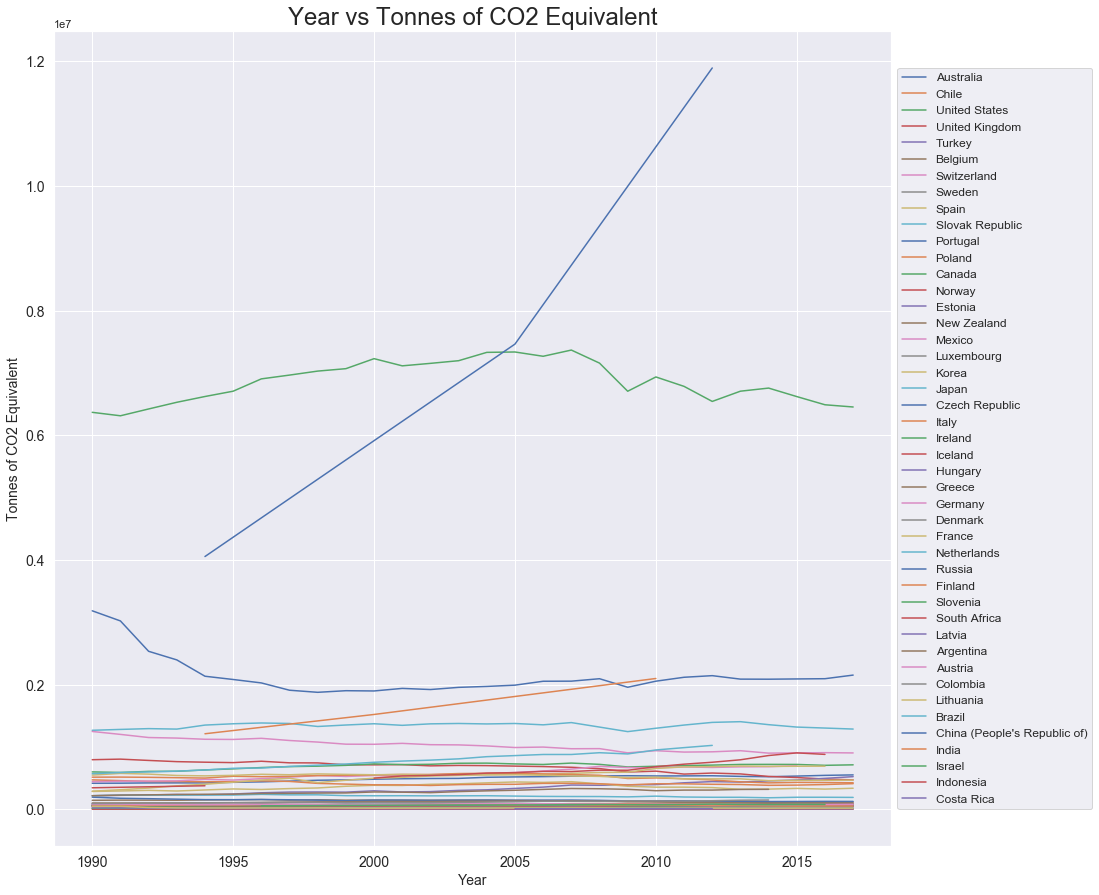

In [174]:
#import dataset
dfPollution = pd.read_csv('AIR_GHG.csv')

#only greenhouse gasses
dfPollution = dfPollution[dfPollution.Pollutant == "Greenhouse gases"]

#only total pollutants
dfPollution = dfPollution[dfPollution.VAR == "TOTAL"]

#drop variable column
dfPollution = dfPollution.drop(["Variable"], axis = 1)

#drop the following countries
dfPollution = dfPollution[dfPollution.Country != "OECD - Total"]
dfPollution = dfPollution[dfPollution.Country != "OECD - Europe"]
dfPollution = dfPollution[dfPollution.Country != "European Union (28 countries)"]

#sort by year
dfPollution = dfPollution.sort_values(by=["Year"])

#figure size is changed to a 10" x 10"
plt.figure(figsize = (15,15)) 

#new variable is created with unique()
unique = dfPollution.Country.unique()

#scatterplots are created
for thing in unique:
    new_df = dfPollution[dfPollution.Country == thing]
    plt.plot(new_df.Year, new_df.Value, label = thing)
    
#legend
plt.legend(prop = {"size": 12}, loc = "center left", bbox_to_anchor = (1, 0.5))

#title is created
plt.title("Year vs Tonnes of CO2 Equivalent", fontsize = 24)

#x and y labels are created
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Tonnes of CO2 Equivalent", fontsize = 14)

#tick sizes are changed
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#scatterplot is displayed
plt.show()

## Part 2: Percent Obese(%) - Tons of Greenhouse Gasses Emitted

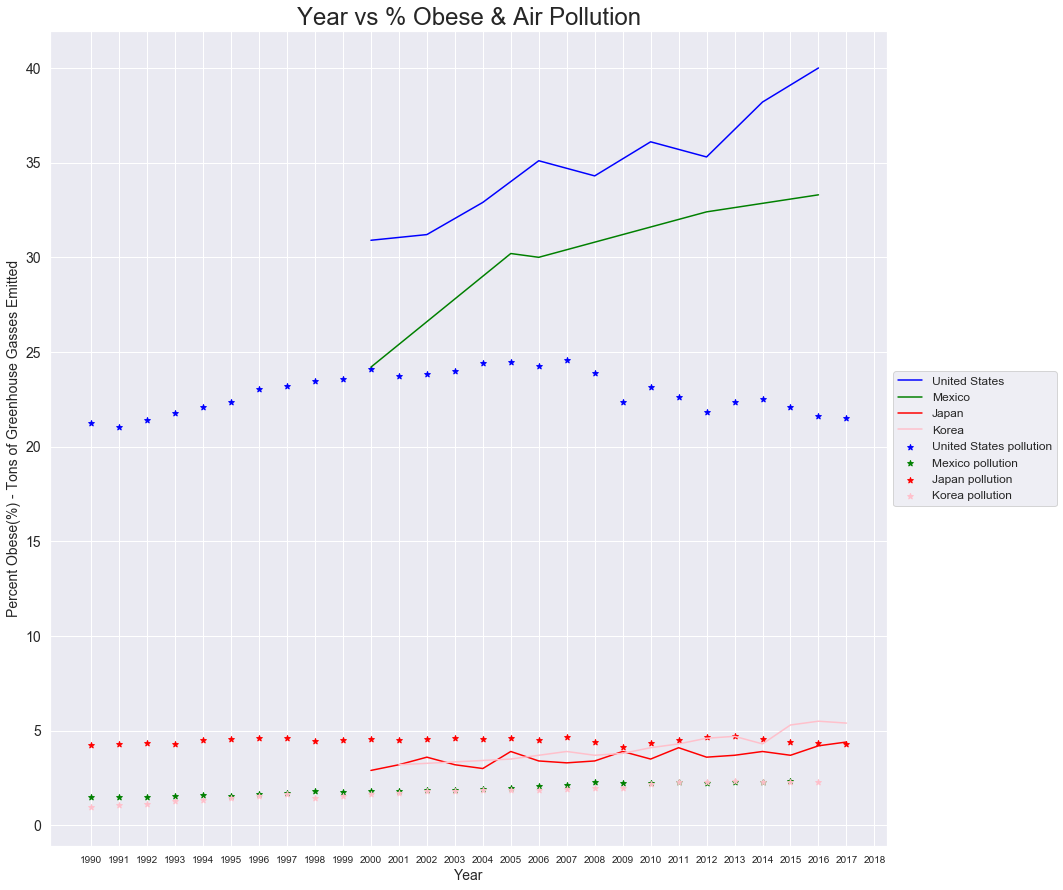

In [177]:
#focus on US, Mexico, Japan, and Korea

#import dataset
dfTotalPopulationUS = dfTotalPopulation[dfTotalPopulation.Country == "United States"]
dfTotalPopulationMexico = dfTotalPopulation[dfTotalPopulation.Country == "Mexico"]
dfTotalPopulationJapan = dfTotalPopulation[dfTotalPopulation.Country == "Japan"]
dfTotalPopulationKorea = dfTotalPopulation[dfTotalPopulation.Country == "Korea"]

#figure size is changed to a 10" x 10"
plt.figure(figsize = (15,15)) 

#4 countries are plotted
plt.plot(dfTotalPopulationUS.Year, dfTotalPopulationUS.Value, label = "United States", color = "blue")
plt.plot(dfTotalPopulationMexico.Year, dfTotalPopulationMexico.Value, label = "Mexico", color = "green")
plt.plot(dfTotalPopulationJapan.Year, dfTotalPopulationJapan.Value, label = "Japan", color = "red")
plt.plot(dfTotalPopulationKorea.Year, dfTotalPopulationKorea.Value, label = "Korea", color = "pink")

#title is created
plt.title("Year vs % Obese & Air Pollution", fontsize = 24)

#x and y labels are created
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Percent Obese(%) - Tons of Greenhouse Gasses Emitted", fontsize = 14)

#tick sizes are changed
plt.xticks(fontsize=10)
plt.yticks(fontsize=14)

#x ticks are added
plt.xticks([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004 , 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

#import dataset
dfPollution = pd.read_csv('AIR_GHG.csv')

#only green house gasses
dfPollution = dfPollution[dfPollution.Pollutant == "Greenhouse gases"]

#only total pollutants
dfPollution = dfPollution[dfPollution.VAR == "TOTAL"]

#drop the variable column
dfPollution = dfPollution.drop(["Variable"], axis = 1)

#only look at target countries
dfPollutionUS = dfPollution[dfPollution.Country == "United States"]
dfPollutionMexico = dfPollution[dfPollution.Country == "Mexico"]
dfPollutionJapan = dfPollution[dfPollution.Country == "Japan"]
dfPollutionKorea = dfPollution[dfPollution.Country == "Korea"]

#scatter plots are created
plt.scatter(dfPollutionUS.Year, dfPollutionUS.Value/300000, label = "United States pollution", color = "blue", marker = "*")
plt.scatter(dfPollutionMexico.Year, dfPollutionMexico.Value/300000, label = "Mexico pollution", color = "green", marker = "*")
plt.scatter(dfPollutionJapan.Year, dfPollutionJapan.Value/300000, label = "Japan pollution", color = "red", marker = "*")
plt.scatter(dfPollutionKorea.Year, dfPollutionKorea.Value/300000, label = "Korea pollution", color = "pink", marker = "*")

#legend
plt.legend(prop = {"size": 12}, loc = "center left", bbox_to_anchor = (1, 0.5))

#scatterplot is displayed
plt.show()

## Part 3: Individual Pollutants

Air pollution (carbon monoxide) + obesity for 2016

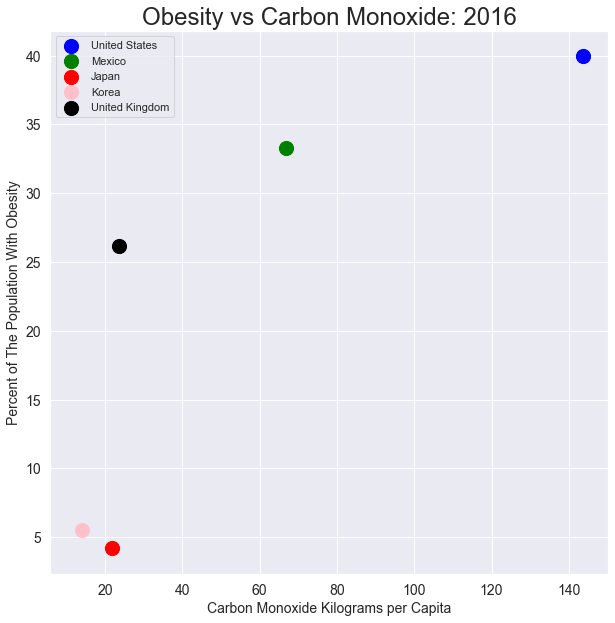

In [169]:
#focus on US, Mexico, Japan, and Korea, United Kingdom

#figure size is changed to a 10" x 10"
plt.figure(figsize = (10,10))

#only look at 2016 data
dfTotalPopulation = dfTotalPopulation[dfTotalPopulation.Year == 2016]

#import dataset
dfTotalPopulationUS = dfTotalPopulation[dfTotalPopulation.Country == "United States"]
dfTotalPopulationUS = dfTotalPopulation[dfTotalPopulation.Country == "United States"]
dfTotalPopulationMexico = dfTotalPopulation[dfTotalPopulation.Country == "Mexico"]
dfTotalPopulationJapan = dfTotalPopulation[dfTotalPopulation.Country == "Japan"]
dfTotalPopulationKorea = dfTotalPopulation[dfTotalPopulation.Country == "Korea"]
dfTotalPopulationUK = dfTotalPopulation[dfTotalPopulation.Country == "United Kingdom"]

#import .csv file
dfPollution = pd.read_csv('AIR_EMISSIONS_CM.csv')

#only look at 2016
dfPollution = dfPollution[dfPollution.Year == 2016]

#target countries are put in seperate data frames
dfPollutionUS = dfPollution[dfPollution.Country == "United States"]
dfPollutionMexico = dfPollution[dfPollution.Country == "Mexico"]
dfPollutionJapan = dfPollution[dfPollution.Country == "Japan"]
dfPollutionKorea = dfPollution[dfPollution.Country == "Korea"]
dfPollutionUK = dfPollution[dfPollution.Country == "United Kingdom"]

#scatter plots are created for target countries
plt.scatter(dfPollutionUS.Value, dfTotalPopulationUS.Value, label = "United States", color = "blue", s = 200)
plt.scatter(dfPollutionMexico.Value, dfTotalPopulationMexico.Value, label = "Mexico", color = "green", s = 200)
plt.scatter(dfPollutionJapan.Value, dfTotalPopulationJapan.Value, label = "Japan", color = "red", s =200)
plt.scatter(dfPollutionKorea.Value, dfTotalPopulationKorea.Value, label = "Korea", color = "pink", s = 200)
plt.scatter(dfPollutionUK.Value, dfTotalPopulationUK.Value, label = "United Kingdom", color = "black", s = 200)

#title is created
plt.title("Obesity vs Carbon Monoxide: 2016", fontsize = 24)

#x and y labels are created
plt.xlabel("Carbon Monoxide Kilograms per Capita", fontsize = 14)
plt.ylabel("Percent of The Population With Obesity", fontsize = 14)

#tick sizes are changed
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#scatter plot with beak length and beak depth from 1975 and 2012
plt.scatter(dfControl.Abdominal_fat, dfControl.Leptin, color = "blue", label = "Control")
plt.scatter(dfHFHS.Abdominal_fat, dfHFHS.Leptin, color = "red", label = "HFHS")

#linear regression line is added to plot
plt.plot(x1, y1, color = "blue")
plt.plot(x2, y2, color = "red")

#first 100 bootstrap estimates of slope and intercept is plotted
for i in range(100):
    x = np.array([0, 10])
    plt.plot(x, slopeControl[i] * x + interceptControl[i], color = "blue", label = "Control", alpha = .03)
    
for i in range(100):
    x = np.array([0, 10])
    plt.plot(x, slopeHFHS[i] * x + interceptHFHS[i], color = "red", label = "HFHS", alpha = .03)  

#legend
plt.legend(loc="best")

#figure is saved
#plt.savefig('Obesity vs Carbon Monoxide.png')

#scatterplot is displayed
plt.show()

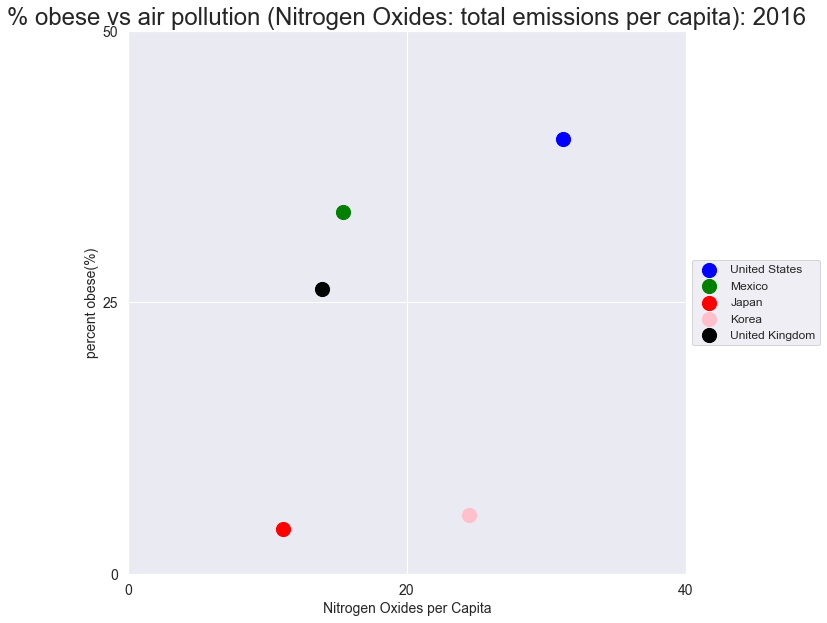

In [150]:
#Air pollution (Nitrogen Oxides) + obesity for 2016


#focus on US, Mexico, Japan, and Korea, United Kingdom

#figure size is changed to a 10" x 10"
plt.figure(figsize = (10,10))

#only look at 2016
dfTotalPopulation = dfTotalPopulation[dfTotalPopulation.Year == 2016]

#import dataset
dfTotalPopulationUS = dfTotalPopulation[dfTotalPopulation.Country == "United States"]
dfTotalPopulationUS = dfTotalPopulation[dfTotalPopulation.Country == "United States"]
dfTotalPopulationMexico = dfTotalPopulation[dfTotalPopulation.Country == "Mexico"]
dfTotalPopulationJapan = dfTotalPopulation[dfTotalPopulation.Country == "Japan"]
dfTotalPopulationKorea = dfTotalPopulation[dfTotalPopulation.Country == "Korea"]
dfTotalPopulationUK = dfTotalPopulation[dfTotalPopulation.Country == "United Kingdom"]

#import .csv file
dfPollution = pd.read_csv('AIR_EMISSIONS_NO.csv')

#only look at 2016 data
dfPollution = dfPollution[dfPollution.Year == 2016]

#target countries are put in seperate data frames
dfPollutionUS = dfPollution[dfPollution.Country == "United States"]
dfPollutionMexico = dfPollution[dfPollution.Country == "Mexico"]
dfPollutionJapan = dfPollution[dfPollution.Country == "Japan"]
dfPollutionKorea = dfPollution[dfPollution.Country == "Korea"]
dfPollutionUK = dfPollution[dfPollution.Country == "United Kingdom"]

#scatter plots are created for target countries
plt.scatter(dfPollutionUS.Value, dfTotalPopulationUS.Value, label = "United States", color = "blue", s = 200)
plt.scatter(dfPollutionMexico.Value, dfTotalPopulationMexico.Value, label = "Mexico", color = "green", s = 200)
plt.scatter(dfPollutionJapan.Value, dfTotalPopulationJapan.Value, label = "Japan", color = "red", s =200)
plt.scatter(dfPollutionKorea.Value, dfTotalPopulationKorea.Value, label = "Korea", color = "pink", s = 200)
plt.scatter(dfPollutionUK.Value, dfTotalPopulationUK.Value, label = "United Kingdom", color = "black", s = 200)


#title is created
plt.title("% Obese vs Air Pollution (Nitrogen Oxides: total emissions per capita): 2016", fontsize = 24)

#x and y labels are created
plt.xlabel("Nitrogen Oxides per Capita", fontsize = 14)
plt.ylabel("Percent Obese(%)", fontsize = 14)

#tick sizes are changed
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#ticks are added
plt.xticks([0, 20, 40])
plt.yticks([0, 25, 50])

#legend
plt.legend(prop = {"size": 12}, loc = "center left", bbox_to_anchor = (1, 0.5))

#scatterplot is displayed
plt.show()

Air pollution (Sulphur Oxides) + obesity for 2016

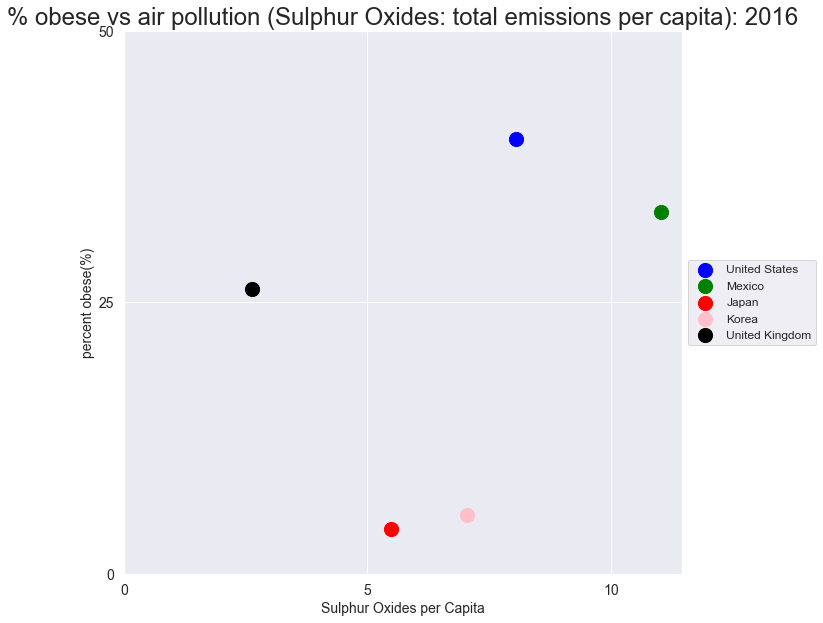

In [151]:
#focus on US, Mexico, Japan, and Korea, United Kingdom
#figure size is changed to a 10" x 10"
plt.figure(figsize = (10,10))

dfTotalPopulation = dfTotalPopulation[dfTotalPopulation.Year == 2016]

#import dataset
dfTotalPopulationUS = dfTotalPopulation[dfTotalPopulation.Country == "United States"]
dfTotalPopulationUS = dfTotalPopulation[dfTotalPopulation.Country == "United States"]
dfTotalPopulationMexico = dfTotalPopulation[dfTotalPopulation.Country == "Mexico"]
dfTotalPopulationJapan = dfTotalPopulation[dfTotalPopulation.Country == "Japan"]
dfTotalPopulationKorea = dfTotalPopulation[dfTotalPopulation.Country == "Korea"]
dfTotalPopulationUK = dfTotalPopulation[dfTotalPopulation.Country == "United Kingdom"]

#import .csv file
dfPollution = pd.read_csv('AIR_EMISSIONS_SO.csv')

#only look at 2016
dfPollution = dfPollution[dfPollution.Year == 2016]

#target countries are put in seperate data frames
dfPollutionUS = dfPollution[dfPollution.Country == "United States"]
dfPollutionMexico = dfPollution[dfPollution.Country == "Mexico"]
dfPollutionJapan = dfPollution[dfPollution.Country == "Japan"]
dfPollutionKorea = dfPollution[dfPollution.Country == "Korea"]
dfPollutionUK = dfPollution[dfPollution.Country == "United Kingdom"]

#scatter plots are created for target countries
plt.scatter(dfPollutionUS.Value, dfTotalPopulationUS.Value, label = "United States", color = "blue", s = 200)
plt.scatter(dfPollutionMexico.Value, dfTotalPopulationMexico.Value, label = "Mexico", color = "green", s = 200)
plt.scatter(dfPollutionJapan.Value, dfTotalPopulationJapan.Value, label = "Japan", color = "red", s =200)
plt.scatter(dfPollutionKorea.Value, dfTotalPopulationKorea.Value, label = "Korea", color = "pink", s = 200)
plt.scatter(dfPollutionUK.Value, dfTotalPopulationUK.Value, label = "United Kingdom", color = "black", s = 200)

#title is created
plt.title("% Obese vs Air Pollution (Sulphur Oxides: total emissions per capita): 2016", fontsize = 24)

#x and y labels are created
plt.xlabel("Sulphur Oxides per Capita", fontsize = 14)
plt.ylabel("Percent Obese(%)", fontsize = 14)

#tick sizes are changed
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#ticks are added
plt.xticks([0, 5, 10])
plt.yticks([0, 25, 50])

#legend
plt.legend(prop = {"size": 12}, loc = "center left", bbox_to_anchor = (1, 0.5))

#scatterplot is displayed
plt.show()